In [25]:
import pandas as pd
import os
import glob
import cv2
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import seaborn as sns
from tqdm import tqdm

In [55]:
data_dir = "../input/data/train"
img_dir = f"{data_dir}/images"

In [56]:
label = ["incorrect_mask", "mask", "normal"]

In [19]:
train_df = pd.read_csv(f"{data_dir}/train.csv")

In [20]:
def get_info(imgs):
    images_info = {"shape": [], "mean": [], "std": []}
    
    for x in tqdm(imgs):
        img = cv2.imread(x)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        images_info["shape"].append(img.shape)
        images_info["mean"].append(img.mean(axis=(0,1)))
        images_info["std"].append(img.std(axis=(0,1)))
        
    return images_info
        
    

In [21]:
people = train_df["id"]
images = glob.glob(os.path.join(img_dir, img_id, '*'))
images_info = get_info(images)
images_shapes = Counter(images_info["shape"])

100%|██████████| 18900/18900 [06:19<00:00, 49.74it/s]


In [26]:
print(f"Number of People = {len(people)}")
print(f"Number of Image = {len(images)}")

print(f"Image Shape Info")
for i in images_shapes:
    print(f"    {i}: {images_shapes[i]}")

print(f'RGB Mean: {np.mean(images_info["mean"], axis=0) / 255.}')
print(f'RGB Standard Deviation: {np.mean(images_info["std"], axis=0) / 255.}')

Number of People = 2700
Number of Image = 18900
Image Shape Info
    (512, 384, 3): 18900
RGB Mean: [0.56019265 0.52410305 0.50145299]
RGB Standard Deviation: [0.23308824 0.24294489 0.2456003 ]


In [27]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

imgs = []
img_id = train_df.iloc[500].path
for x in glob.glob(os.path.join(img_dir, img_id, '*')):
    img = cv2.imread(x)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    imgs.append(img)
    
imgs = np.array(imgs)

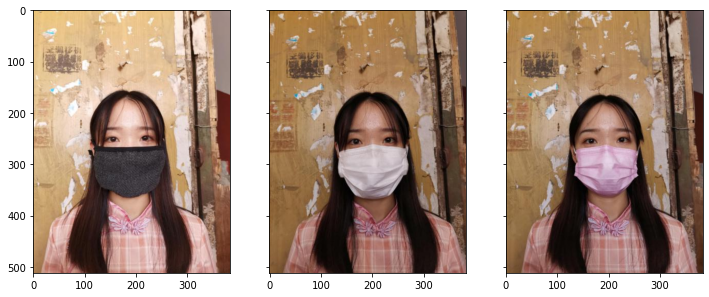

In [28]:
fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12, 6))
axes[0].imshow(imgs[0])
axes[1].imshow(imgs[1])
axes[2].imshow(imgs[-1])
plt.show()

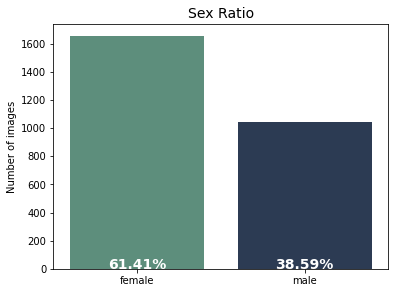

In [29]:
plt.figure(figsize=(6, 4.5)) 
ax = sns.countplot(x = 'gender', data = train_df, palette=["#55967e", "#263959"])

plt.xticks( np.arange(2), ['female', 'male'] )
plt.title('Sex Ratio',fontsize= 14)
plt.xlabel('')
plt.ylabel('Number of images')

counts = train_df['gender'].value_counts()
counts_pct = [f'{elem * 100:.2f}%' for elem in counts / counts.sum()]
for i, v in enumerate(counts_pct):
    ax.text(i, 0, v, horizontalalignment = 'center', size = 14, color = 'w', fontweight = 'bold')
    
plt.show()

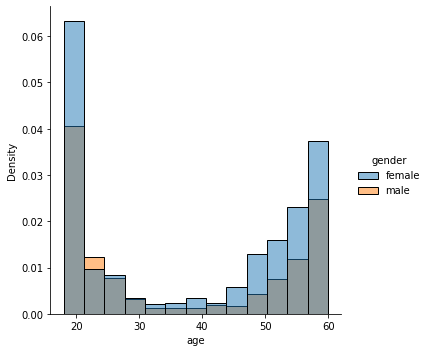

In [30]:
sns.displot(train_df, x="age", hue="gender", stat="density")
plt.show()

In [31]:
train_df['age'].describe()

count    2700.000000
mean       37.708148
std        16.985904
min        18.000000
25%        20.000000
50%        36.000000
75%        55.000000
max        60.000000
Name: age, dtype: float64

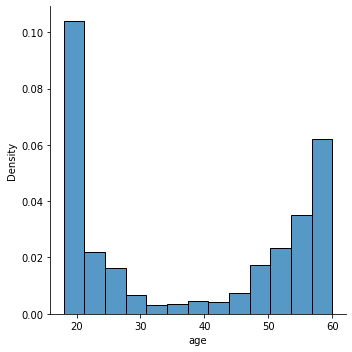

In [32]:
sns.displot(train_df, x="age", stat="density")
plt.show()

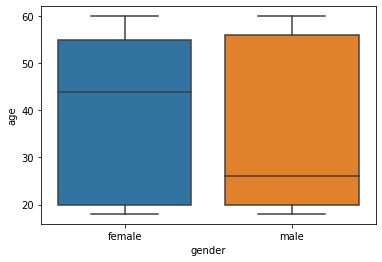

In [33]:
sns.boxplot(x='gender', y='age', data=train_df)
plt.show()

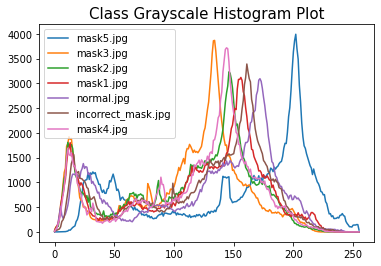

In [34]:
img_id = train_df.iloc[500].path

plt.figure()
plt.subplot(111)
legend = []
for x in glob.glob(os.path.join(img_dir, img_id, '*')):
    legend.append(x.split("/")[-1])
    img = cv2.imread(x)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    histogram, bin_edges = np.histogram(img, bins=256, range=(0, 255))
    sns.lineplot(data=histogram)

plt.legend(legend)
plt.title('Class Grayscale Histogram Plot', fontsize=15)
plt.show()

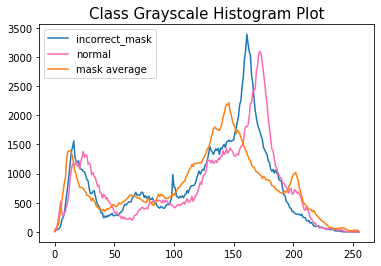

In [40]:
plt.figure()
plt.subplot(111)

img = cv2.imread(glob.glob(os.path.join(img_dir, img_id, 'incorrect*'))[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
histogram, bin_edges = np.histogram(img, bins=256, range=(0, 255))
sns.lineplot(data=histogram)

img = cv2.imread(glob.glob(os.path.join(img_dir, img_id, 'normal*'))[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
histogram, bin_edges = np.histogram(img, bins=256, range=(0, 255))
sns.lineplot(data=histogram, color='hotpink')

histograms = []
for i in range(5):
    img = cv2.imread(glob.glob(os.path.join(img_dir, img_id, 'mask*'))[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    histogram, bin_edges = np.histogram(img, bins=256, range=(0, 255))
    histograms.append(histogram)
sns.lineplot(data=np.mean(histograms, axis=0))

plt.legend(['incorrect_mask', 'normal', 'mask average'])
plt.title('Class Grayscale Histogram Plot', fontsize=15)
plt.show()

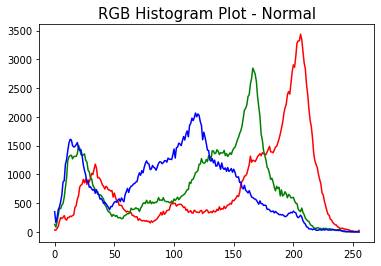

In [41]:
plt.figure()
plt.subplot(111)

img = cv2.imread(glob.glob(f"{directory}/images/{img_id}/normal*")[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
colormap = ['red', 'green', 'blue']
for i in range(3):
    histogram, bin_edges = np.histogram(img[..., i], bins=256, range=(0, 255))
    sns.lineplot(data=histogram, color=colormap[i])

plt.title('RGB Histogram Plot - Normal', fontsize=15)
plt.show()

In [42]:
imgs = []
bboxes = []
not_found_idx = []
img_id = train_df.iloc[504].path
files = glob.glob(f"{directory}/images/{img_id}/*")

for i, x in enumerate(files):
    img = cv2.imread(x)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    bbox = face_cascade.detectMultiScale(img)
    imgs.append(img)
    if len(bbox) != 0:
        bboxes.append(bbox.max(axis=0))
    else:
        not_found_idx.append(i)
        print(f'{x} not found face')
imgs = np.array(imgs)
bboxes = np.array(bboxes)

input/data/train/images/001133_male_Asian_56/mask5.jpg not found face
input/data/train/images/001133_male_Asian_56/mask1.jpg not found face
input/data/train/images/001133_male_Asian_56/incorrect_mask.jpg not found face


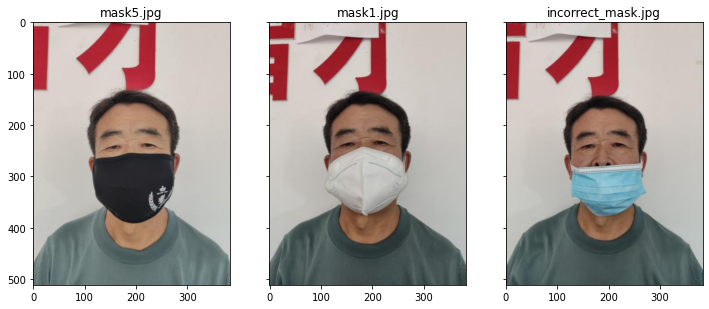

In [43]:
fig, axes = plt.subplots(1, len(not_found_idx), sharex=True, sharey=True, figsize=(12, 6))
for i, j in enumerate(not_found_idx):
    axes[i].imshow(imgs[j])
    axes[i].set_title(f'{directory}/images/{img_id}/{files[j]}'.split("/")[-1])
plt.show()

In [44]:
def plot_raw_images(img_dir, img_id):
    """
    마스크 미착용 이미지를 시각화하는 함수입니다.
    
    Args:
        img_dir: 학습 데이터셋 이미지 폴더 경로 
        img_id: 학습 데이터셋 하위폴더 이름
    """
    img = cv2.imread(glob.glob(f"{directory}/images/{img_id}/normal*")[0])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(6,6))
    plt.imshow(img)


In [45]:
def show_from_id(idx):
    img_id = train_df.iloc[idx].path
    gen = train_df.iloc[idx].gender
    age = train_df.iloc[idx].age
    plot_raw_images(directory, img_id)
    plt.title(f'{gen} {age}')
    plt.show()


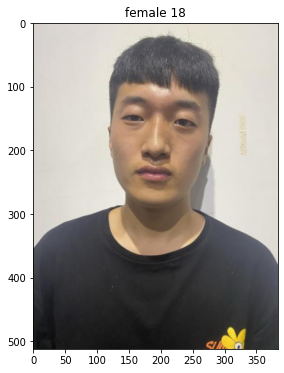

In [46]:
show_from_id(2399)

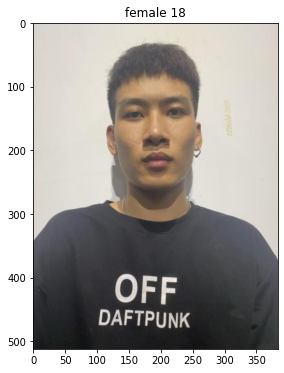

In [47]:
show_from_id(2400)

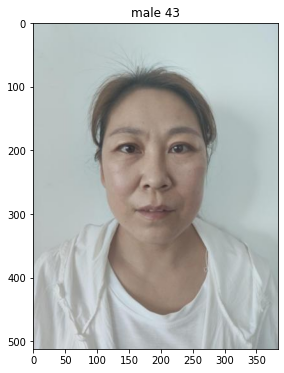

In [48]:
show_from_id(1912)

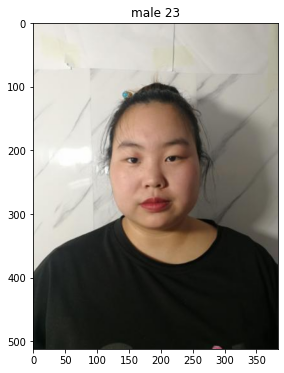

In [49]:
show_from_id(764)

In [73]:
def plot_mask_images(img_dir, img_id):
    """
    마스크 정상착용 5장과 이상하게 착용한 1장을 2x3의 격자에 시각화하는 함수입니다.
    
    Args:
        img_dir: 학습 데이터셋 이미지 폴더 경로 
        img_id: 학습 데이터셋 하위폴더 이름
    """
        
    imgs = [cv2.cvtColor(cv2.imread(x), cv2.COLOR_BGR2RGB) for x in sorted(glob.glob(os.path.join(img_dir, img_id, "*")))][:]
    
    n_rows, n_cols = 2, 3
    fig, axes = plt.subplots(n_rows, n_cols, sharex=True, sharey=True, figsize=(15, 12))
    for i in range(n_rows*n_cols):
        axes[i//(n_rows+1)][i%n_cols].imshow(imgs[i])
        axes[i//(n_rows+1)][i%n_cols].set_title(f'{label[1 if 0<i<n_rows*n_cols else i]}', color='r')
    plt.tight_layout()
    plt.show()

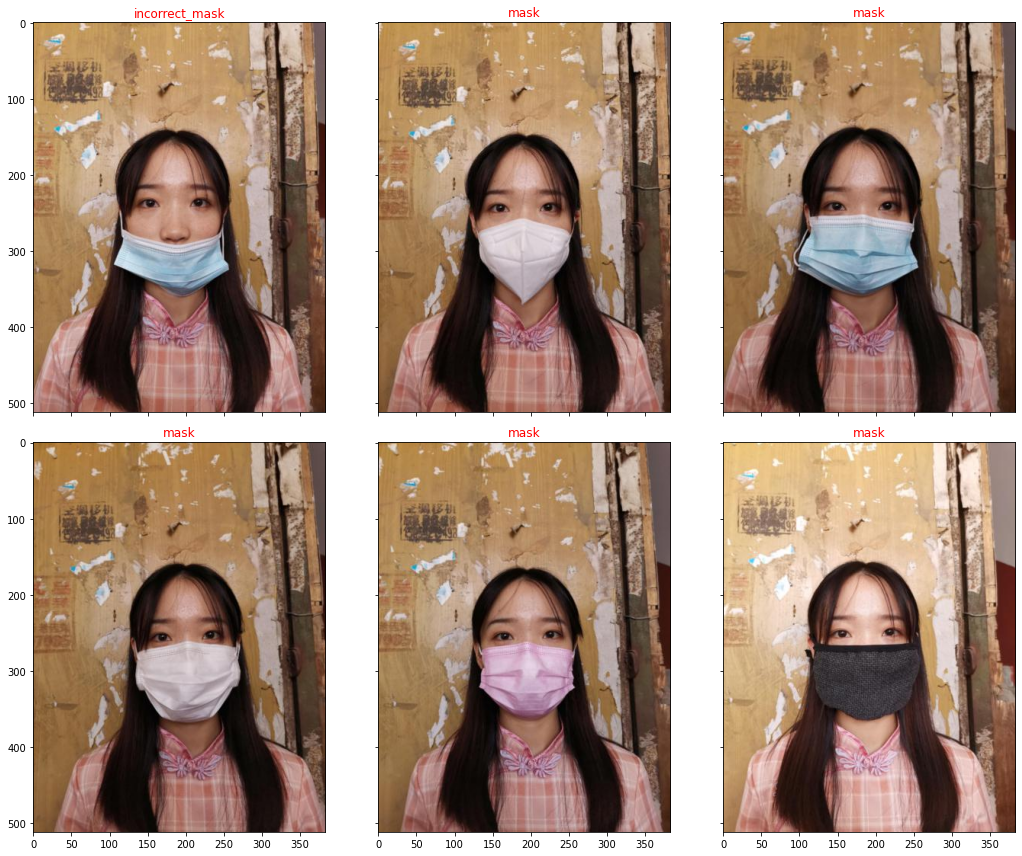

In [78]:
idx = 500
img_id = train_df.iloc[idx].path
plot_mask_images(img_dir, img_id)

In [79]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [80]:
n_imgs = 100

imgs = []
for img_id in train_df.path.values[:n_imgs]:
    for x in glob.glob(f"{directory}/images/{img_id}/*"):
        img = cv2.imread(x)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        imgs.append(img)
imgs = np.array(imgs)
n_samples, h, w = imgs.shape

imgs = np.reshape(imgs, (n_samples, h*w))

In [81]:
from time import time

n_components = 30

t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(imgs)
print(f"pca is fitted in {time() - t0:.0f}s")
print(f'Explained variation per principal component: \n{pca.explained_variance_ratio_}')

eigenfaces = pca.components_.reshape((n_components, h, w))
img_pca = pca.transform(imgs)

pca is fitted in 6s
Explained variation per principal component: 
[0.16400326 0.10583063 0.07423401 0.05696066 0.03344144 0.02725812
 0.02416491 0.02329299 0.02024698 0.01692823 0.01573051 0.0135788
 0.01292895 0.0118508  0.01141356 0.00954073 0.00822209 0.00784372
 0.00709925 0.0067026  0.00646111 0.0062661  0.00592074 0.00564904
 0.00546339 0.00517203 0.00475177 0.00465529 0.00437168 0.00420404]


In [83]:
num2class = ['incorrect_mask', 'mask1', 'mask2', 'mask3',
             'mask4', 'mask5', 'normal']
class2num = {k: v for v, k in enumerate(num2class)}


pca_df = pd.DataFrame(img_pca, columns=[str(col) for col in range(n_components)])
pca_df['class_id'] = [num2class[n % len(num2class)] for n in range(n_samples)]
pca_df['class_id'] = pca_df['class_id'].map(lambda x: x if x in ['incorrect_mask', 'normal'] else 'mask')

In [84]:
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,class_id
0,-0.471291,-0.071718,0.958463,0.108679,-0.292028,0.376624,1.425376,-0.045753,1.474494,1.001269,...,0.112561,-2.433528,0.011234,-0.088240,-0.579839,1.362207,-1.449906,1.255174,-2.292598,incorrect_mask
1,-0.354729,-0.443177,1.248912,0.965023,0.401113,0.732332,0.595702,-0.243739,0.063750,0.278055,...,1.053907,-0.555512,0.291864,0.385767,-0.797164,-0.679949,-0.864794,0.863878,-0.095657,mask
2,-0.878974,-0.366530,0.961205,0.348114,0.147959,-0.001421,0.647867,-0.286865,0.415880,0.085197,...,0.990276,0.477790,0.447958,1.311545,-0.041066,-0.411993,0.022888,1.099224,-0.602845,mask
3,-1.530998,0.054309,1.062860,0.448517,0.221638,0.127036,-0.152810,2.102634,2.525298,0.800270,...,-0.560915,-0.489065,-0.536998,-0.572818,1.182621,-0.702835,0.077121,0.520185,-0.616427,mask
4,-1.119840,-0.240759,0.945242,0.284536,0.123791,-0.326918,0.270036,0.004712,0.781553,0.206192,...,0.891542,0.964531,-0.166601,0.773797,0.089977,-0.784163,-0.676434,1.103405,-0.244952,mask


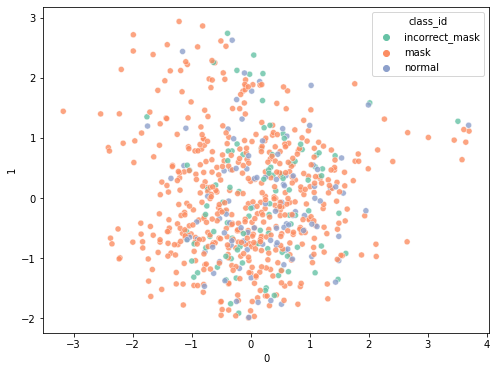

In [85]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='0', y='1',
    hue="class_id",
    data=pca_df,
    legend="full",
    palette=sns.color_palette("Set2", 3),
    alpha=0.8
)
plt.show()

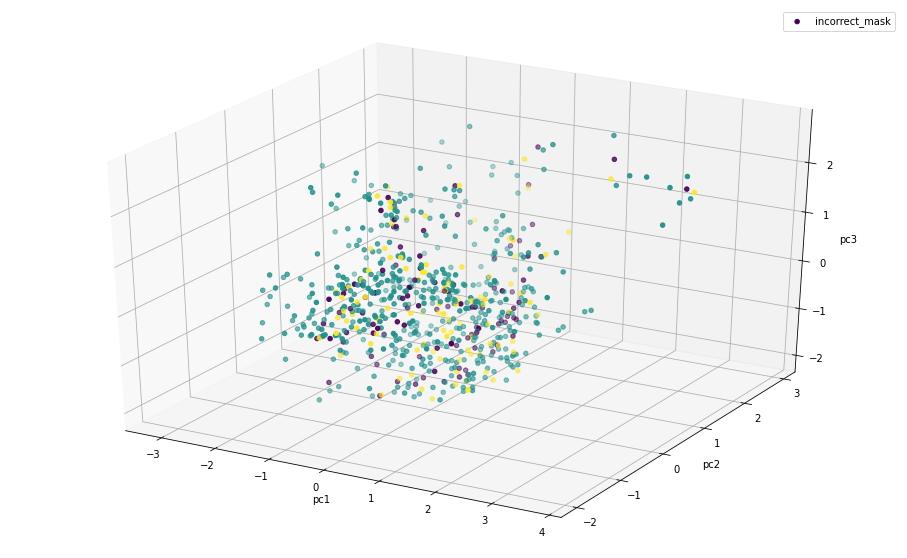

In [86]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
simplified_num2class = ['incorrect_mask', 'mask', 'normal']
simplified_class2num = {k: v for v, k in enumerate(simplified_num2class)}
ax.scatter(
    xs=pca_df["0"], 
    ys=pca_df["1"], 
    zs=pca_df["2"], 
    c=pca_df['class_id'].map(lambda x: simplified_class2num[x]), 
)
ax.set_xlabel('pc1')
ax.set_ylabel('pc2')
ax.set_zlabel('pc3')

plt.legend(simplified_num2class)
plt.show()

In [87]:
time_start = time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(img_pca)
print('t-SNE done! Time elapsed: {} seconds'.format(time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 700 samples in 0.000s...
[t-SNE] Computed neighbors for 700 samples in 0.038s...
[t-SNE] Computed conditional probabilities for sample 700 / 700
[t-SNE] Mean sigma: 2.321108
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.336151
[t-SNE] KL divergence after 300 iterations: 1.252165
t-SNE done! Time elapsed: 0.7415003776550293 seconds


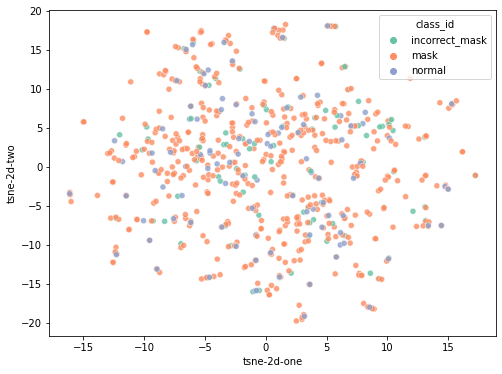

In [88]:
pca_df['tsne-2d-one'] = tsne_results[:,0]
pca_df['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="class_id",
    palette=sns.color_palette("Set2", 3),
    data=pca_df,
    legend="full",
    alpha=0.8
)
plt.show()